In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import GCRCatalogs
from GCRCatalogs.helpers.tract_catalogs import tract_filter, sample_filter
from GCRCatalogs import GCRQuery

In [2]:
cat = GCRCatalogs.load_catalog("cosmoDC2_v1.1.4_small")

In [3]:
#ici on met un filtre
data = cat.get_quantities(['halo_mass', 'ra', 'dec', 'redshift'], filters=['halo_mass > 1e13', 'is_central'])
#Careful, data is a dict

## 1D halo_mass

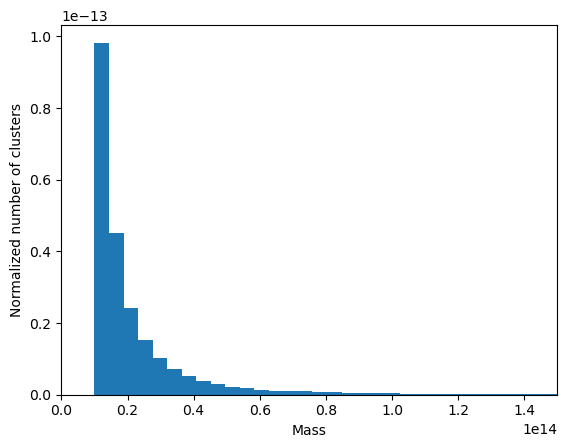

In [17]:
plt.hist(data['halo_mass'], bins = 300, density = True)
plt.xlim(0,1.5e14)
plt.xlabel('Mass')
plt.ylabel('Normalized number of clusters')
plt.show()

## 2D map ra/dec of all halos.

Text(0, 0.5, 'dec')

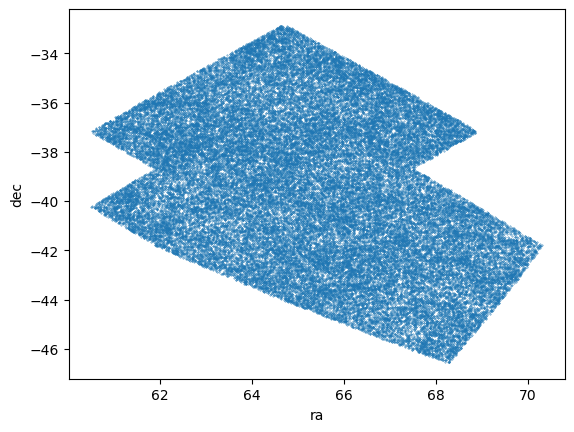

In [18]:
plt.scatter(data['ra'], data['dec'], s=.1)
plt.xlabel('ra')
plt.ylabel('dec')

## Same with cut at 10*14 inf 

Text(0, 0.5, 'dec')

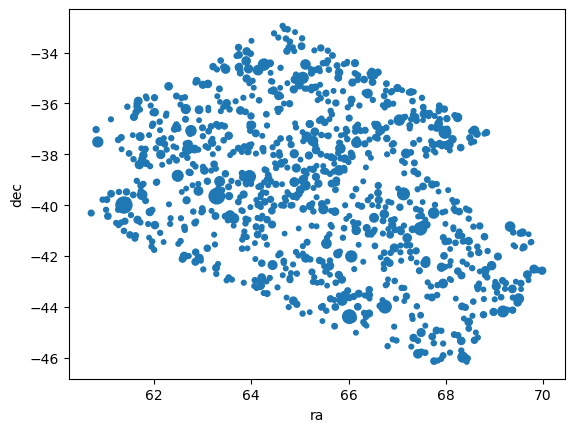

In [19]:
import pandas as pd
data_df = pd.DataFrame(data)
data_f = data_df[data_df['halo_mass']>1e14]
plt.scatter(data_f['ra'], data_f['dec'],s=(data_f['halo_mass']/1e13))
plt.xlabel('ra')
plt.ylabel('dec')

## Redshift of all halos

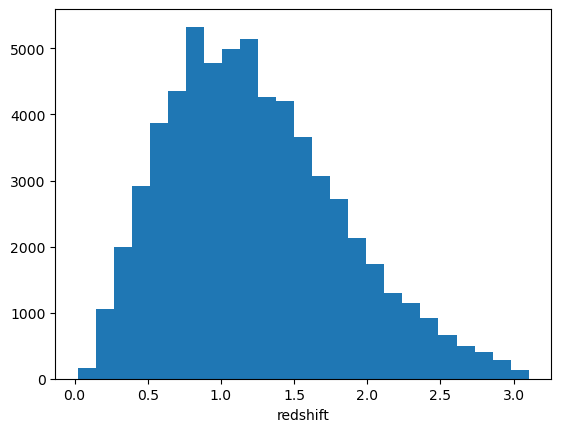

In [20]:
plt.hist(data['redshift'], bins = 25)
plt.xlabel('redshift')
plt.show()

## Redshift of halos in mass bins

In [21]:
data_m1 = data_df[data_df['halo_mass']>1e13]
data_m2 = data_df[data_df['halo_mass']>1e14]
data_m3 = data_df[data_df['halo_mass']>1e15]
data_m1 = data_m1[data_df['halo_mass']<1e14]
data_m2 = data_m2[data_df['halo_mass']<1e15]
data_m3 = data_m3[data_df['halo_mass']<1e16]

/tmp/ipykernel_8101/1776122698.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_m2 = data_m2[data_df['halo_mass']<1e15]
/tmp/ipykernel_8101/1776122698.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_m3 = data_m3[data_df['halo_mass']<1e16]


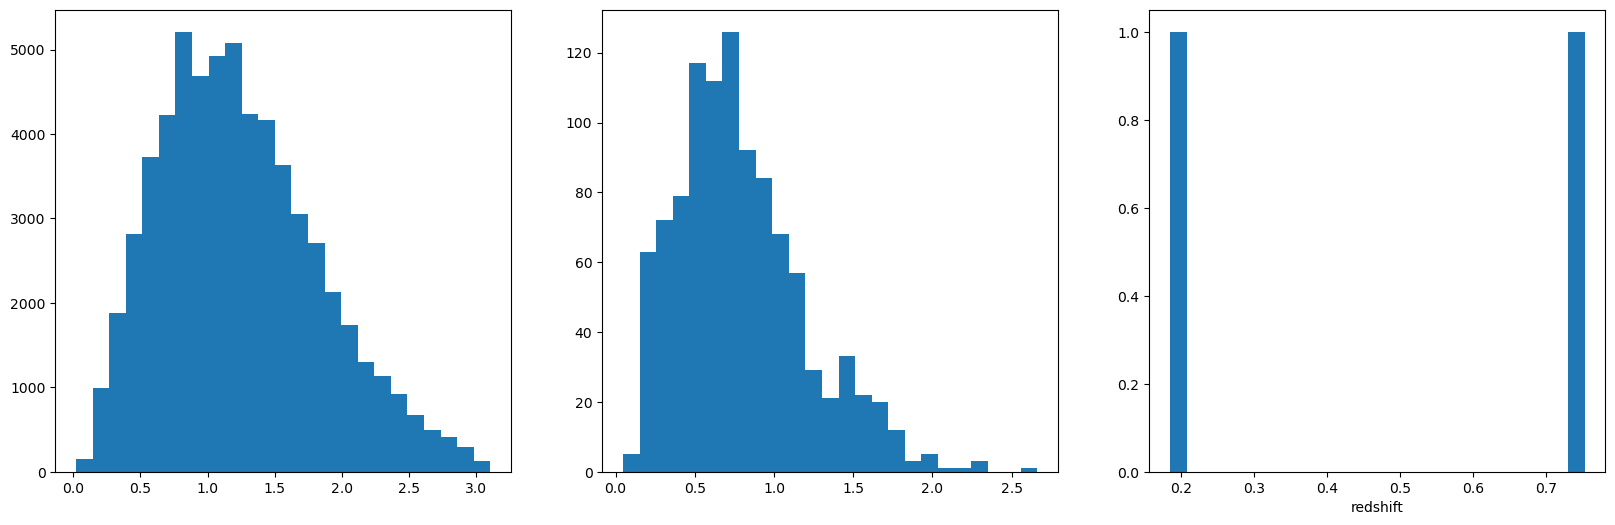

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,6))
ax1.hist(data_m1['redshift'], bins = 25)
ax2.hist(data_m2['redshift'], bins = 25)
ax3.hist(data_m3['redshift'], bins = 25)
plt.xlabel('redshift')
plt.show()

## 2D plots of redshifts and masses

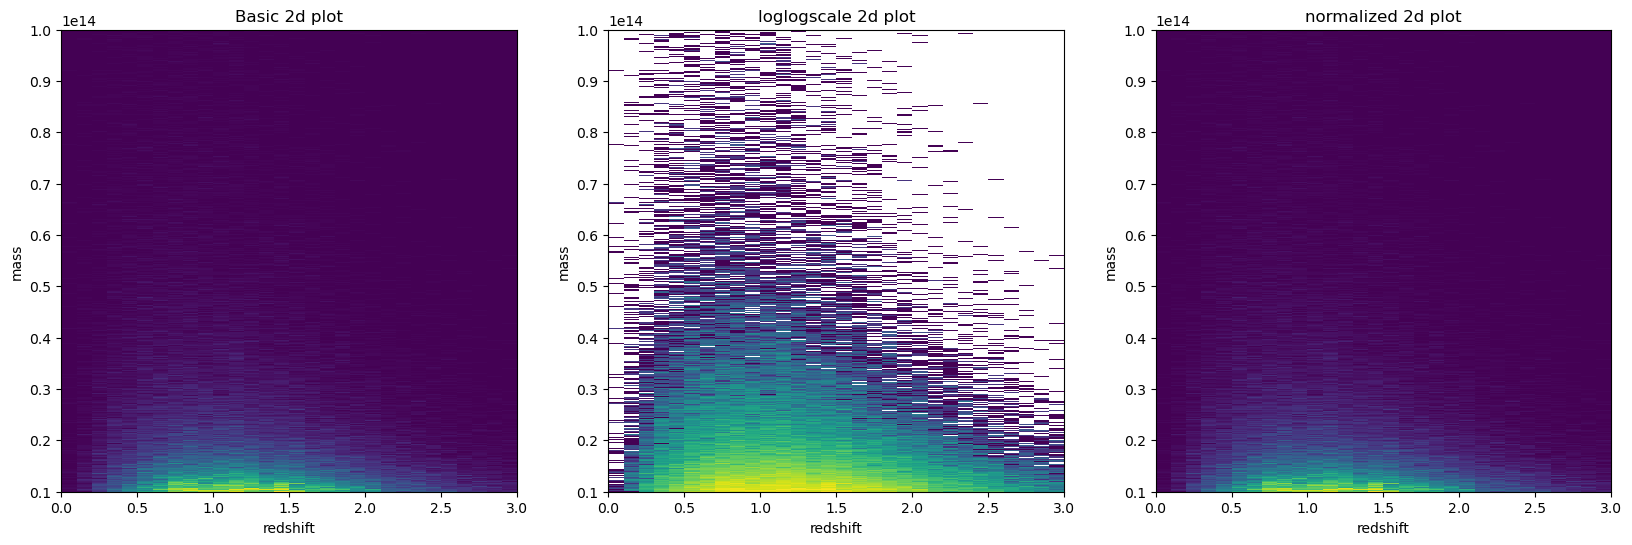

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,6))
ax1.hist2d(data['redshift'], data['halo_mass'], bins = (30,500),range=[[0,3],[1e13,1e14]])
ax2.hist2d(data['redshift'], data['halo_mass'], bins = (30,500),norm=matplotlib.colors.LogNorm(),range=[[0,3],[1e13,1e14]])
ax3.hist2d(data['redshift'], data['halo_mass'], bins = (30,500),density=True,range=[[0,3],[1e13,1e14]])
ax1.set_xlabel('redshift')
ax1.set_ylabel('mass')
ax1.set_title('Basic 2d plot')
ax2.set_xlabel('redshift')
ax2.set_ylabel('mass')
ax2.set_title('loglogscale 2d plot')
ax3.set_xlabel('redshift')
ax3.set_ylabel('mass')
ax3.set_title('normalized 2d plot')
plt.show()

## Redshift of halos in mass bins

### 1) Binning [$10^{13}-10^{14}$]

In [24]:
bin_corners = np.linspace(1e13,1e14,10)
bin_list = [[bin_corners[i],bin_corners[i+1]] for i in range(len(bin_corners)-1)]
res = []
for bin in bin_list:
    mask = (data_df['halo_mass'] < bin[1]) * (data_df['halo_mass'] > bin[0])
    r_cut = data_df['redshift'][mask]
    res.append(np.mean(r_cut)) #Append new point to list
mid_bin = np.mean(bin_list,  axis=1)

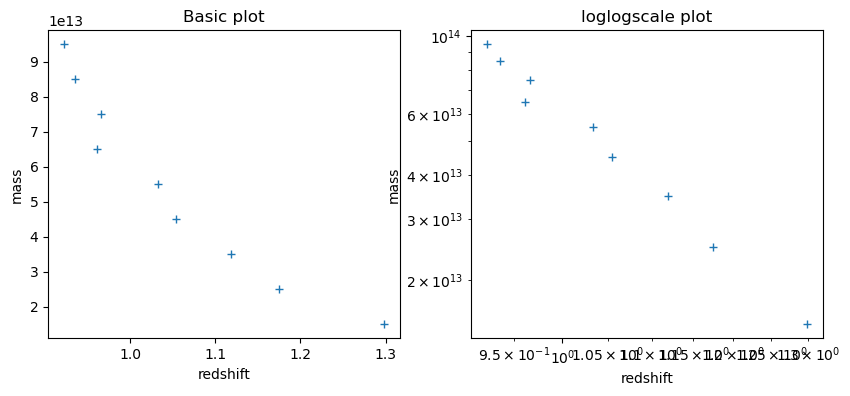

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))
ax1.plot(res, mid_bin, linestyle = 'none', marker = '+')
ax2.loglog(res, mid_bin, linestyle = 'none', marker = '+')
ax1.set_xlabel('redshift')
ax1.set_ylabel('mass')
ax1.set_title('Basic plot')
ax2.set_xlabel('redshift')
ax2.set_ylabel('mass')
ax2.set_title('loglogscale plot')
plt.show()

### 2) Binning m $>10^{14}$

In [26]:
bin_corners2 = np.linspace(1e14,1e15,10)
bin_list2 = [[bin_corners2[i],bin_corners2[i+1]] for i in range(len(bin_corners2)-1)]
res2 = []
for bin in bin_list2:
    mask2 = (data_df['halo_mass'] < bin[1]) * (data_df['halo_mass'] > bin[0])
    r_cut2 = data_df['redshift'][mask2]
    res2.append(np.mean(r_cut2)) #Append new point to list
mid_bin2 = np.mean(bin_list2,  axis=1)

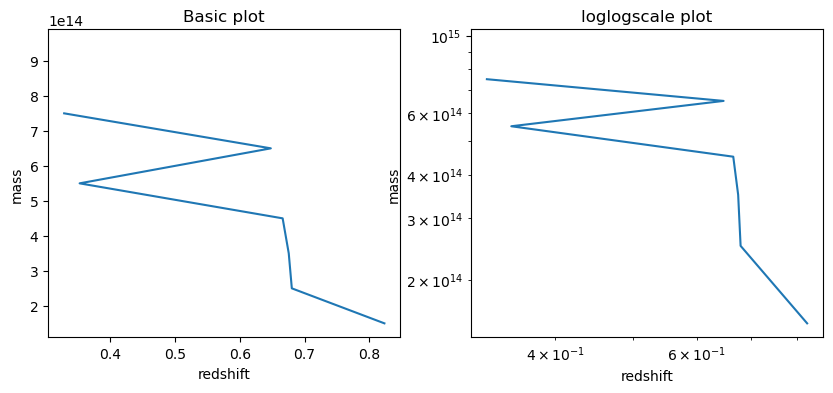

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))
ax1.plot(res2, mid_bin2)
ax2.loglog(res2, mid_bin2)
ax1.set_xlabel('redshift')
ax1.set_ylabel('mass')
ax1.set_title('Basic plot')
ax2.set_xlabel('redshift')
ax2.set_ylabel('mass')
ax2.set_title('loglogscale plot')
plt.show()

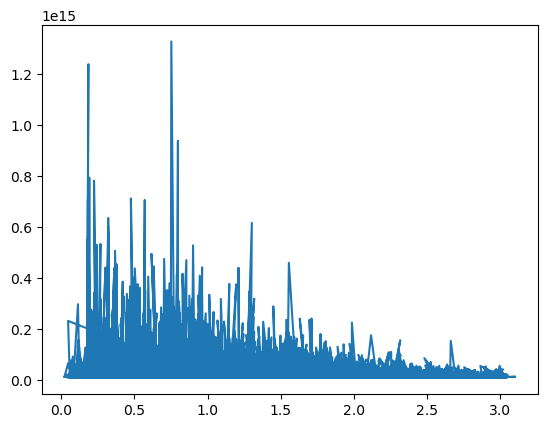

In [30]:
plt.plot(data['redshift'], data['halo_mass'])